In [62]:
import keras
import keras.models as km
import keras.layers as kl
from keras.utils import np_utils

import numpy as np

import json

import matplotlib.pyplot as plt


In [63]:
# download dataset from json object
f = open(r'./imagery/shipsnet.json')
dataset = json.load(f)
f.close()

images = np.array(dataset['data']).astype('uint8')
y = np.array(dataset['labels']).astype('uint8')

color_chanels = 3
weight = 80
height = 80
X = images.reshape([-1, color_chanels, weight, height])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1)


# X has the following structure: X[imageid, y,x,channel]
print('X: ',X.shape)  # data
print('y: ',y.shape)  # target

print('Class 0: ',sum(y==0))
print('Class 1: ',sum(y==1))
print('Total  : ',len(y))

X:  (4000, 3, 80, 80)
y:  (4000,)
Class 0:  3000
Class 1:  1000
Total  :  4000


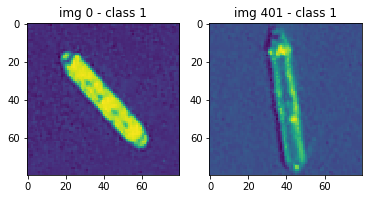

In [64]:
fig, axes = plt.subplots(1,2)
k=0

plt.sca(axes[0])
plt.imshow(X[k][2])

plt.title('img {} - class {}'.format(k, y[k]))

k=401
plt.sca(axes[1])
plt.imshow(X[k][0])
plt.title('img {} - class {}'.format(k, y[k]));

In [84]:
input_shape = (80, 80, 3)

model = km.Sequential()
#! Add layers to your convolutional neural network   

model.add(kl.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(kl.MaxPooling2D(pool_size=(2, 2)))
model.add(kl.Dropout(0.25))

model.add(kl.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(kl.MaxPooling2D(pool_size=(2, 2)))
model.add(kl.Dropout(0.25))

model.add(kl.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(kl.MaxPooling2D(pool_size=(2, 2)))
model.add(kl.Dropout(0.25))

model.add(kl.Conv2D(32, kernel_size=(3, 3), 
                    activation='relu', 
                    input_shape=input_shape))
model.add(kl.MaxPooling2D(pool_size=(2, 2)))
model.add(kl.Dropout(0.25))

model.add(kl.Flatten())

model.add(kl.Dense(512, activation='relu'))

model.add(kl.Dropout(0.5))

model.add(kl.Dense(1, activation='sigmoid'))

In [88]:
# output encoding
y = np_utils.to_categorical(labels, 2)

indexes = np.arange(2800)

#np.random.seed(42)
np.random.shuffle(indexes)

X_train = X[indexes].transpose([0,2,3,1])
y_train = labels[indexes]

# normalization
# X_train = X_train / 255

model.compile(loss=keras.losses.mean_squared_logarithmic_error, 
             optimizer=keras.optimizers.RMSprop(),
             metrics=['accuracy'])

batch_size = 100
epochs = 18
history = model.fit(X_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    validation_split=0.3,
                    shuffle=True)

Train on 1959 samples, validate on 841 samples
Epoch 1/18
1959/1959 [==============================] - 13s 7ms/step - loss: 0.0832 - acc: 0.7310 - val_loss: 0.0550 - val_acc: 0.8894
Epoch 2/18
1959/1959 [==============================] - 13s 6ms/step - loss: 0.0411 - acc: 0.8862 - val_loss: 0.0332 - val_acc: 0.9203
Epoch 3/18
1959/1959 [==============================] - 13s 6ms/step - loss: 0.0324 - acc: 0.9071 - val_loss: 0.0391 - val_acc: 0.9203
Epoch 4/18
1959/1959 [==============================] - 12s 6ms/step - loss: 0.0288 - acc: 0.9219 - val_loss: 0.0224 - val_acc: 0.9465
Epoch 5/18
1959/1959 [==============================] - 13s 7ms/step - loss: 0.0257 - acc: 0.9296 - val_loss: 0.0219 - val_acc: 0.9489
Epoch 6/18
1959/1959 [==============================] - 12s 6ms/step - loss: 0.0227 - acc: 0.9377 - val_loss: 0.0252 - val_acc: 0.9275
Epoch 7/18
1959/1959 [==============================] - 13s 7ms/step - loss: 0.0214 - acc: 0.9423 - val_loss: 0.0149 - val_acc: 0.9548
Epoch 8/